# [DACON] 제주 신용카드 빅데이터 경진대회
 - 2019.01 ~ 2020.03 기간 신용카드 사용 내역 데이터를 활용한 지역별, 업종별 월간 카드 사용 총액 예측

In [33]:
'''
정리
 - 1. 데이터 불러오기
 - 2. 데이터 전처리
   (1) groupby
   (2) CCG 삭제, 10대 삭제, CSTMR_CNT 보정, 
   (3) 비어있는 값 채우기(설명변수(?) 모든 조합을 포함한 데이터셋 생성)
 - 3. 시각화
   (1) 월별 총 소비금액
   (2) 업종별 월별 총 소비금액
   (3) 지역별 월별 총 소비금액
   
    - 시도별 sex, age, flc 비율 (cstmr_cnt로 간접적으로 확인하거나 공공데이터 찾아보기)
'''

'\n정리\n - 1. 데이터 불러오기\n - 2. 데이터 전처리\n   (1) groupby\n   (2) CCG 삭제, 10대 삭제, CSTMR_CNT 보정, \n   (3) 비어있는 값 채우기(설명변수(?) 모든 조합을 포함한 데이터셋 생성)\n - 3. 시각화\n   (1) 월별 총 소비금액\n   (2) 업종별 월별 총 소비금액\n   (3) 지역별 월별 총 소비금액\n   \n    - 시도별 sex, age, flc 비율 (cstmr_cnt로 간접적으로 확인하거나 공공데이터 찾아보기)\n'

In [18]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'

from IPython.display import Image

In [2]:
data = pd.read_csv('C:/data/jeju_data/201901-202003.csv'); data

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3
...,...,...,...,...,...,...,...,...,...,...,...,...
24697787,202003,충북,충주시,휴양콘도 운영업,충북,충주시,30s,1,2,3,43300,4
24697788,202003,충북,충주시,휴양콘도 운영업,충북,충주시,40s,1,3,3,35000,3
24697789,202003,충북,충주시,휴양콘도 운영업,충북,충주시,50s,1,4,4,188000,6
24697790,202003,충북,충주시,휴양콘도 운영업,충북,충주시,50s,2,4,4,99000,6


<b>각 행의 의미:</b>
 - 2019년 11월에 *(REG_YYMM)*
 - 서울시 종로구의 한식음식점업에서 *(CARD_SIDO_NM, CARD_CCG_NM, STD_CLSS_NM)*
 - 경기도 용인시에 거주하며 1인가구인 20대 남성 127명이 *(HOM_SIDO_NM, HOM_CCG_NM, FLC, AGE, SEX_CTGO_CD, CSTMR_CNT)*
 - 총 결제201만 9000원을 결제했으며,*(AMT)*
 - 결제 횟수는 총 101번이다. *(CNT)*

In [ ]:
data.info()

In [ ]:
data.isnull().sum()

In [ ]:
print(' ''CARD_CCG_NM''의 결측 비율: {:.3f}%'.format((data.isnull().sum()['CARD_CCG_NM'] / data.shape[0])*100))
print(' ''HOM_CCG_NM''의 결측 비율: {:.3f}%'.format((data.isnull().sum()['HOM_CCG_NM'] / data.shape[0])*100))

In [3]:
# 시군구 col 삭제
data.drop(['CARD_CCG_NM', 'HOM_CCG_NM'], axis=1, inplace=True) ;data

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,201901,강원,건강보조식품 소매업,강원,20s,1,1,4,311200,4
1,201901,강원,건강보조식품 소매업,강원,30s,1,2,7,1374500,8
2,201901,강원,건강보조식품 소매업,강원,30s,2,2,6,818700,6
3,201901,강원,건강보조식품 소매업,강원,40s,1,3,4,1717000,5
4,201901,강원,건강보조식품 소매업,강원,40s,1,4,3,1047300,3
...,...,...,...,...,...,...,...,...,...,...
24697787,202003,충북,휴양콘도 운영업,충북,30s,1,2,3,43300,4
24697788,202003,충북,휴양콘도 운영업,충북,40s,1,3,3,35000,3
24697789,202003,충북,휴양콘도 운영업,충북,50s,1,4,4,188000,6
24697790,202003,충북,휴양콘도 운영업,충북,50s,2,4,4,99000,6


In [4]:
# groupby
data = data.groupby(['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM', 'HOM_SIDO_NM', 'AGE', 'SEX_CTGO_CD', 'FLC']).sum().reset_index(drop=False)

In [5]:
data

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,201901,강원,건강보조식품 소매업,강원,20s,1,1,4,311200,4
1,201901,강원,건강보조식품 소매업,강원,30s,1,2,44,5169295,45
2,201901,강원,건강보조식품 소매업,강원,30s,2,2,89,8618550,91
3,201901,강원,건강보조식품 소매업,강원,40s,1,2,3,454420,3
4,201901,강원,건강보조식품 소매업,강원,40s,1,3,53,6441165,60
...,...,...,...,...,...,...,...,...,...,...
1057389,202003,충북,휴양콘도 운영업,충북,40s,1,4,9,385700,10
1057390,202003,충북,휴양콘도 운영업,충북,50s,1,4,10,790350,19
1057391,202003,충북,휴양콘도 운영업,충북,50s,2,4,4,99000,6
1057392,202003,충북,휴양콘도 운영업,충북,60s,1,5,6,228800,6


<b>그룹화한 train데이터의 각 행의 의미</b>
 - 2020년 11월에 *(REG_YYMM)*
 - 서울시의 한식음식점업에서 *(CARD_SIDO_NM)*
 - 경기도에 거주하는 1인가구 20대 여성 n명이 *(HOM_SIDO_NM, FLC, AGE, SEX_CTGO_CD, CSTMR_CNT)*
 - 총 k번에 걸쳐 m원을 결제했다. *(CNT, AMT)*

In [30]:
# 업종별 사용금액 중 10대가 차지하는 비율

# 전연령의 업종별 사용금액
temp1 = data[['STD_CLSS_NM', 'AMT']].groupby('STD_CLSS_NM').sum().reset_index(drop=False)

# 10대의 업종별 사용금액
age_10s = data.loc[data['AGE']=='10s']
temp2 = age_10s[['STD_CLSS_NM', 'AMT']].groupby('STD_CLSS_NM').sum().reset_index(drop=False)
temp2.rename(columns={'AMT': 'AMT_10s'}, inplace=True); temp2

temp = temp1.merge(temp2)
del temp1, temp2

temp['proportion'] = (temp['AMT_10s']/temp['AMT'])*100 ;temp

,STD_CLSS_NM,AMT,AMT_10s,proportion


In [ ]:
print(temp['AMT'].sum())
print(temp['AMT_10s'].sum())
print(temp['AMT_10s'].sum()/temp['AMT'].sum()*100)

'''
10대 총 소비량은 전체의 0.25%를 차지하며,
업종별로 살펴봤을 때, 가장 큰 비율을 차지하는 업종은 피자 햄버거 샌드위치 및 유사 음식점업으로 1.2%, 비알콜 음료점업 1.1%였다.
(업종별 총 소비량 중 10대가 차지하는 비율이 1%를 넘는 업종은 위 두 업종뿐)
 - 이를 통해 10대의 소비 패턴을 일부 파악할 수도 있지만, 주점업 등의 데이터도 존재하는것으로 보아 모두 10대의 소비 패턴이라고 보기는 어렵다.
 - 따라서, 연령정보, 가구유형정보는 사용할 수 없을 것으로 판단되며
 - 10대 데이터의 금액 비중이 높지 않으므로 계산의 편리함을 위해 제거하도록 한다.

'''

In [32]:
'''
하지만, 그럼에도 불구하고 제출할 때는 10대 데이터도 포함해야할 것으로 보임
만약 10대 데이터를 빼고 연구(?)하면 20대~70대의 정확도는 높아질지라도 10대는 예측하기 힘듦
따라서, 10대 데이터로만 따로 모델을 만드는 방법 등을 사용해야할 것으로 보임
'''

'\n하지만, 그럼에도 불구하고 제출할 때는 10대 데이터도 포함해야할 것으로 보임\n만약 10대 데이터를 빼고 연구(?)하면 20대~70대의 정확도는 높아질지라도 10대는 예측하기 힘듦\n따라서, 10대 데이터로만 따로 모델을 만드는 방법 등을 사용해야할 것으로 보임\n'

In [6]:
# 10대 삭제
data = data.drop(data[data.AGE == '10s'].index); data

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,201901,강원,건강보조식품 소매업,강원,20s,1,1,4,311200,4
1,201901,강원,건강보조식품 소매업,강원,30s,1,2,44,5169295,45
2,201901,강원,건강보조식품 소매업,강원,30s,2,2,89,8618550,91
3,201901,강원,건강보조식품 소매업,강원,40s,1,2,3,454420,3
4,201901,강원,건강보조식품 소매업,강원,40s,1,3,53,6441165,60
...,...,...,...,...,...,...,...,...,...,...
1057389,202003,충북,휴양콘도 운영업,충북,40s,1,4,9,385700,10
1057390,202003,충북,휴양콘도 운영업,충북,50s,1,4,10,790350,19
1057391,202003,충북,휴양콘도 운영업,충북,50s,2,4,4,99000,6
1057392,202003,충북,휴양콘도 운영업,충북,60s,1,5,6,228800,6



 - CSTMR_CNT: 이용고객수
 - CNT: 이용건수

--> Then, 이용고객수>이용건수인 경우는? --> 승인취소가 반영되지 않았을 수 있음 <br>
--> 따라서, CSTMR_CNT>CNT인 경우, CSTMR_CNT를 CNT값으로 대체하기 

In [7]:
# CSTMR_CNT 보정
data.loc[data['CSTMR_CNT']>data['CNT'], 'CSTMR_CNT']=data['CNT']

In [8]:
## 비어있는 값 채우기
'''
1. 포맷(템플릿) 만들기
2. 원데이터와의 결합을 위해 자료형 변경(object -> int)
3. merge
4. fillna(0)
'''

# 1. 포맷(템플릿) 만들기
'''
cols = ['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM', 'HOM_SIDO_NM', 'AGE', 'SEX_CTGO_CD', 'FLC']
 --> 예상 row 수 = 15 * 17 * 41 * 17 * 6 * 2 * 5 = 10,664,100
'''

REG_YYMMs = data['REG_YYMM'].unique().tolist()
SIDOs = data['CARD_SIDO_NM'].unique().tolist()
CLASSs = data['STD_CLSS_NM'].unique().tolist()
AGEs = data['AGE'].unique().tolist()
SEXs = data['SEX_CTGO_CD'].unique().tolist()
FLCs = data['FLC'].unique().tolist()

temp = []
for REG_YYMM in REG_YYMMs:
    for CARD_SIDO in SIDOs:
        for CLASS in CLASSs:
            for HOM_SIDO in SIDOs:
                for AGE in AGEs:
                    for SEX in SEXs:
                        for FLC in FLCs:
                            temp.append([REG_YYMM, CARD_SIDO, CLASS, HOM_SIDO, AGE, SEX, FLC])
temp = np.array(temp)

In [9]:
template = pd.DataFrame(temp, columns=['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM', 'HOM_SIDO_NM', 'AGE', 'SEX_CTGO_CD', 'FLC']); template

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,SEX_CTGO_CD,FLC
0,201901,강원,건강보조식품 소매업,강원,20s,1,1
1,201901,강원,건강보조식품 소매업,강원,20s,1,2
2,201901,강원,건강보조식품 소매업,강원,20s,1,3
3,201901,강원,건강보조식품 소매업,강원,20s,1,4
4,201901,강원,건강보조식품 소매업,강원,20s,1,5
...,...,...,...,...,...,...,...
10664095,202003,충북,정기 항공 운송업,충북,70s,2,1
10664096,202003,충북,정기 항공 운송업,충북,70s,2,2
10664097,202003,충북,정기 항공 운송업,충북,70s,2,3
10664098,202003,충북,정기 항공 운송업,충북,70s,2,4


In [10]:
# 자료형 변경
template = template.astype({'REG_YYMM':int, 'FLC':int, 'SEX_CTGO_CD':int})

In [12]:
# MERGE
train = pd.merge(template, data, on=['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM', 'HOM_SIDO_NM', 'AGE', 'SEX_CTGO_CD', 'FLC'], how='outer'); train

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,201901,강원,건강보조식품 소매업,강원,20s,1,1,4.0,311200.0,4.0
1,201901,강원,건강보조식품 소매업,강원,20s,1,2,NaN,NaN,NaN
2,201901,강원,건강보조식품 소매업,강원,20s,1,3,NaN,NaN,NaN
3,201901,강원,건강보조식품 소매업,강원,20s,1,4,NaN,NaN,NaN
4,201901,강원,건강보조식품 소매업,강원,20s,1,5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
10664095,202003,충북,정기 항공 운송업,충북,70s,2,1,NaN,NaN,NaN
10664096,202003,충북,정기 항공 운송업,충북,70s,2,2,NaN,NaN,NaN
10664097,202003,충북,정기 항공 운송업,충북,70s,2,3,NaN,NaN,NaN
10664098,202003,충북,정기 항공 운송업,충북,70s,2,4,NaN,NaN,NaN


In [13]:
# fillna(0)
train = train.fillna(0)

In [14]:
train

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,201901,강원,건강보조식품 소매업,강원,20s,1,1,4.0,311200.0,4.0
1,201901,강원,건강보조식품 소매업,강원,20s,1,2,0.0,0.0,0.0
2,201901,강원,건강보조식품 소매업,강원,20s,1,3,0.0,0.0,0.0
3,201901,강원,건강보조식품 소매업,강원,20s,1,4,0.0,0.0,0.0
4,201901,강원,건강보조식품 소매업,강원,20s,1,5,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
10664095,202003,충북,정기 항공 운송업,충북,70s,2,1,0.0,0.0,0.0
10664096,202003,충북,정기 항공 운송업,충북,70s,2,2,0.0,0.0,0.0
10664097,202003,충북,정기 항공 운송업,충북,70s,2,3,0.0,0.0,0.0
10664098,202003,충북,정기 항공 운송업,충북,70s,2,4,0.0,0.0,0.0


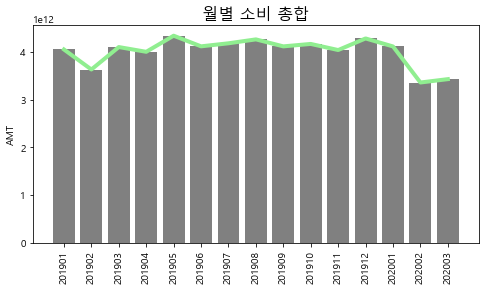

In [19]:
temp = train[['REG_YYMM', 'AMT']].groupby('REG_YYMM').sum().reset_index(drop=False); temp

plt.figure(figsize=(8, 4))

x_values = ['201901', '201902', '201903', '201904', '201905', '201906', '201907', '201908', '201909', 
           '201910', '201911', '201912', '202001', '202002', '202003']
plt.bar(x_values, temp['AMT'], color='grey')
sns.lineplot(x=x_values, y='AMT', data=temp, linewidth=4, color='lightgreen')
plt.xticks(rotation=90)
plt.title('월별 소비 총합', fontsize=16)
plt.show()

del temp

In [20]:
# 업종 list
class_list = train['STD_CLSS_NM'].unique().tolist(); class_list #41개 업종 존재

['건강보조식품 소매업',
 '골프장 운영업',
 '과실 및 채소 소매업',
 '관광 민예품 및 선물용품 소매업',
 '그외 기타 스포츠시설 운영업',
 '그외 기타 종합 소매업',
 '기타 대형 종합 소매업',
 '기타 수상오락 서비스업',
 '기타 외국식 음식점업',
 '기타 주점업',
 '기타음식료품위주종합소매업',
 '내항 여객 운송업',
 '마사지업',
 '면세점',
 '버스 운송업',
 '비알콜 음료점업',
 '빵 및 과자류 소매업',
 '서양식 음식점업',
 '수산물 소매업',
 '슈퍼마켓',
 '스포츠 및 레크레이션 용품 임대업',
 '여관업',
 '여행사업',
 '욕탕업',
 '육류 소매업',
 '일반유흥 주점업',
 '일식 음식점업',
 '자동차 임대업',
 '전시 및 행사 대행업',
 '중식 음식점업',
 '차량용 가스 충전업',
 '차량용 주유소 운영업',
 '체인화 편의점',
 '택시 운송업',
 '피자 햄버거 샌드위치 및 유사 음식점업',
 '한식 음식점업',
 '호텔업',
 '화장품 및 방향제 소매업',
 '휴양콘도 운영업',
 '그외 기타 분류안된 오락관련 서비스업',
 '정기 항공 운송업']

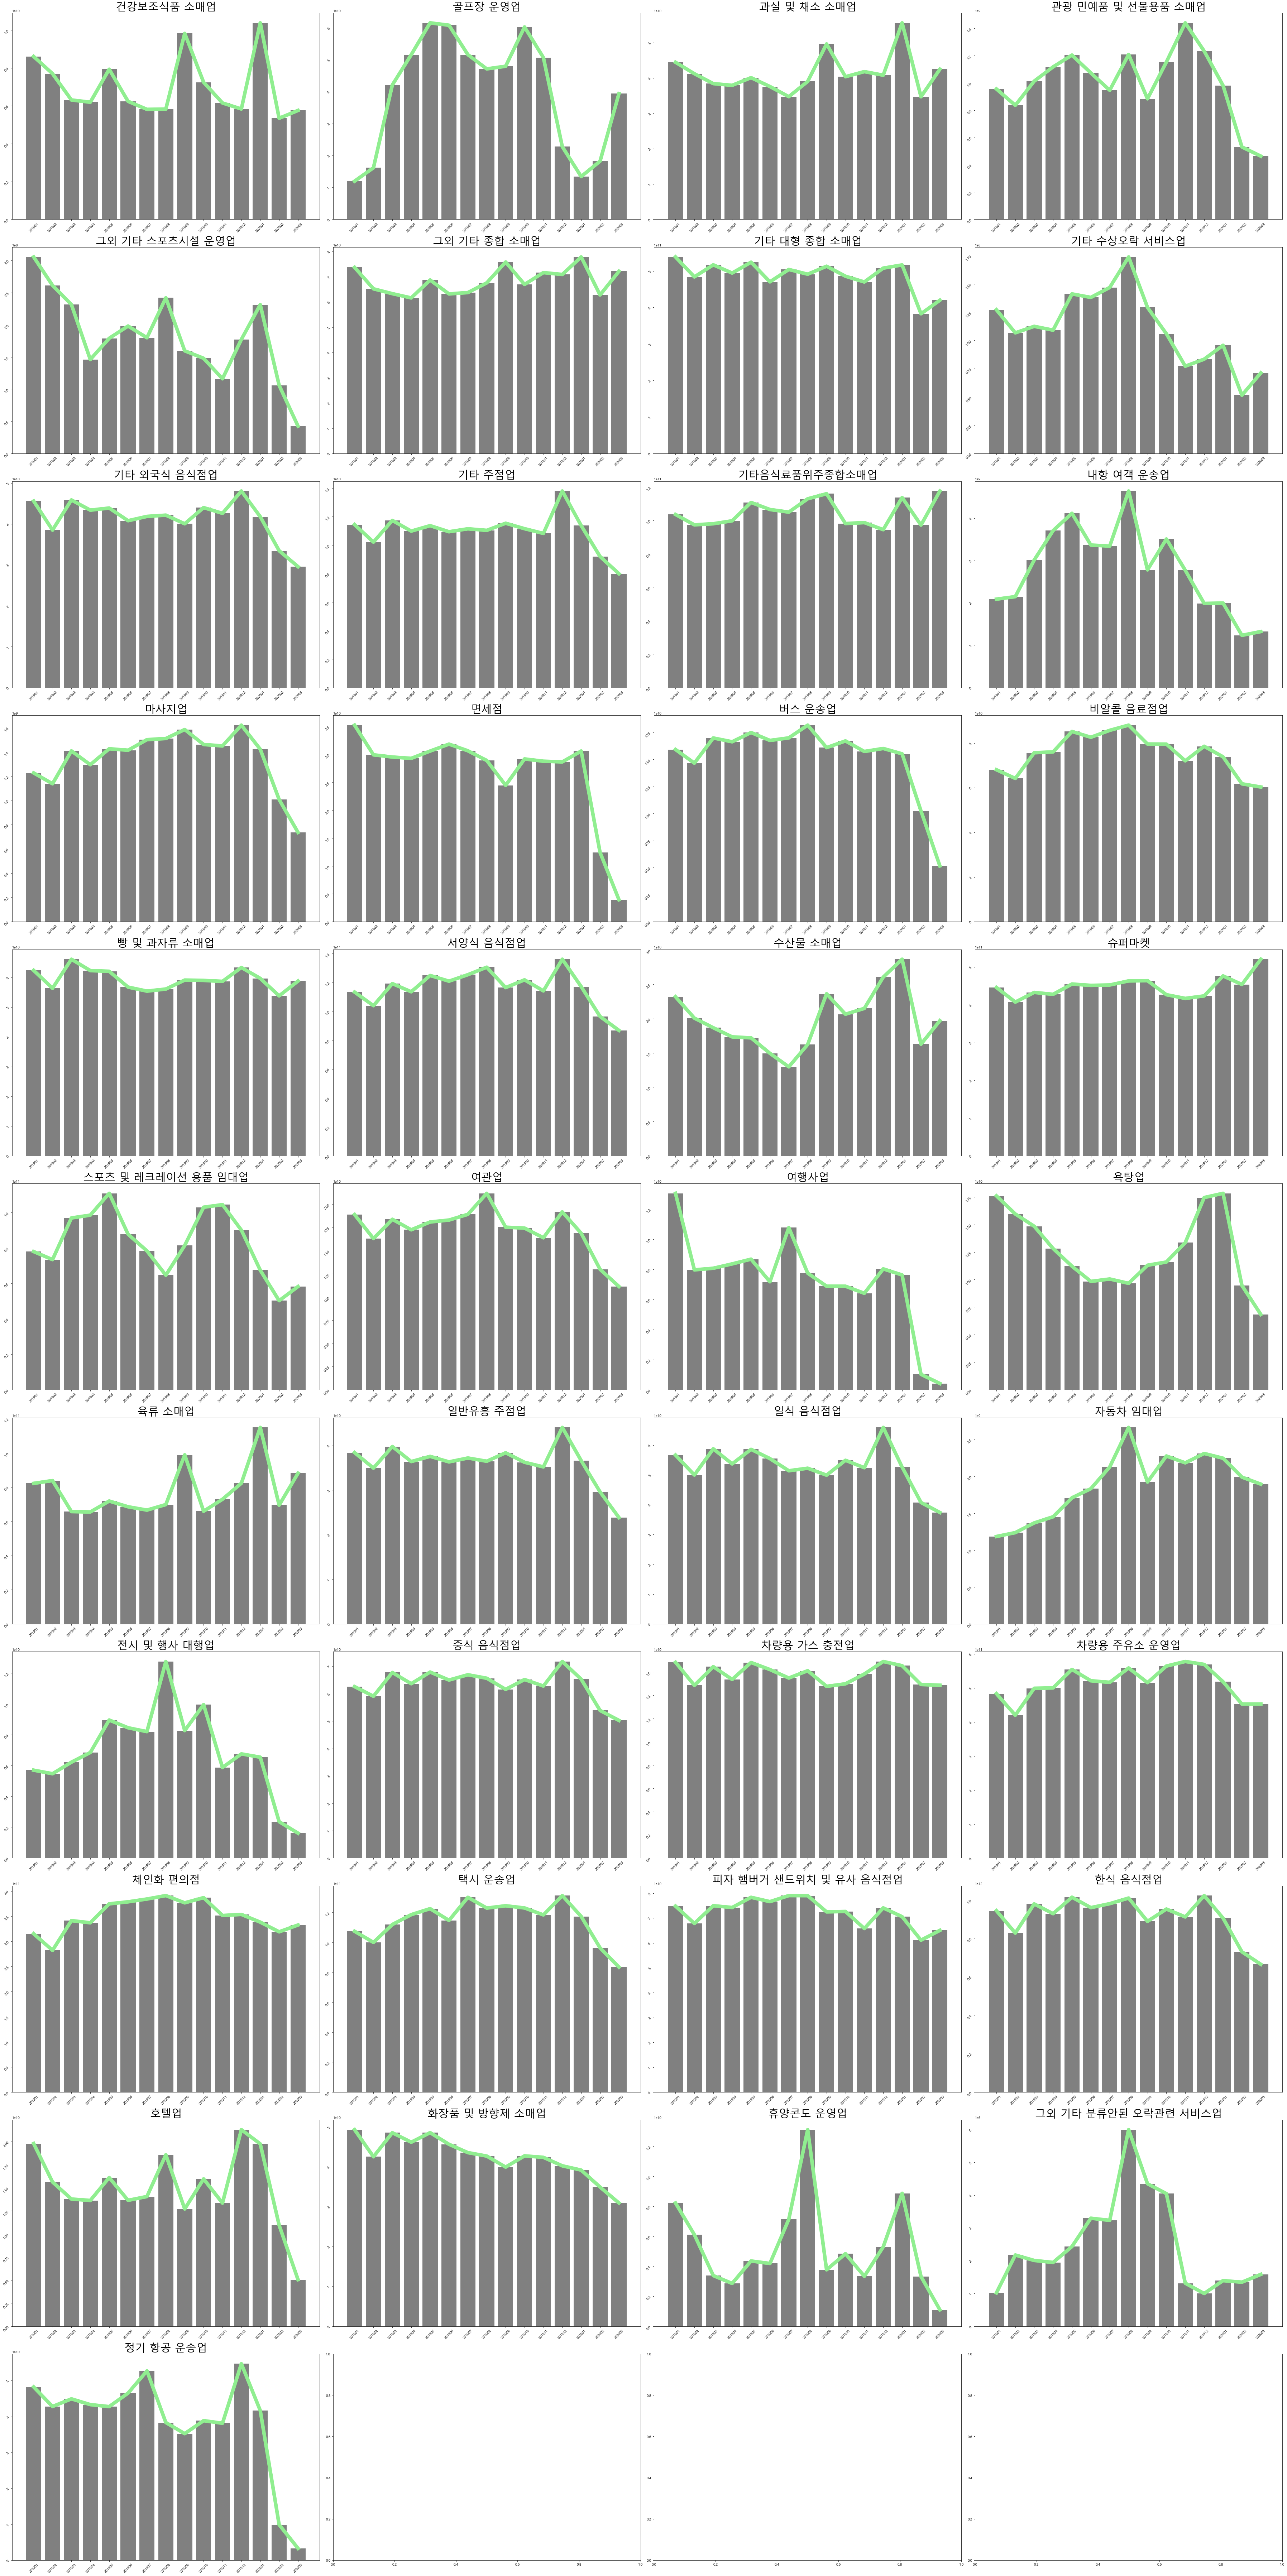

In [21]:
## 업종별 월별 사용량 추이
# plotting
fig, ax = plt.subplots(11, 4, figsize=(50, 100))
ax = ax.flatten()

x_values = ['201901', '201902', '201903', '201904', '201905', '201906', '201907', '201908', '201909', '201910', '201911', '201912', 
            '202001', '202002', '202003']

for i in range(0, 41):
    temp = train.loc[train['STD_CLSS_NM']==class_list[i]]
    temp = temp[['REG_YYMM', 'AMT']].groupby('REG_YYMM').sum().reset_index(drop=False)
    y_values = temp['AMT'].tolist()
    ax[i].bar(x_values, y_values, color='grey')
    ax[i].plot(x_values, y_values, color='lightgreen', linewidth=10)
    ax[i].set_title(class_list[i], fontsize=30)
    ax[i].tick_params(labelrotation=45)

plt.tight_layout()

del temp

In [22]:
## 각 업종별로 2020년 2월~3월 매출이 전년 동기대비 얼마나 감소했는지
'''
기준: 2개년도 2~3월 평균비교 or 2개년도 2~3월 합 비교 or 2개년도 1분기(1월~3월) 평균 or 합 비교 --> 몇퍼센트 줄었는지 비율로 확인할것
'''

## 1. 2개년도 1분기 합 비교
# 각 업종별로 19년 1분기 총합, 20년 1분기 총합 구하기
Q1_19 = [201901, 201902, 201903]
Q1_20 = [202001, 202002, 202003]

temp1 = train.loc[train['REG_YYMM'].isin(Q1_19)][['REG_YYMM', 'STD_CLSS_NM', 'AMT']].groupby(['STD_CLSS_NM']).sum().reset_index(drop=False)
temp1 = temp1.drop(['REG_YYMM'],axis=1)
temp1.rename(columns={'AMT':'AMT_19Q1'}, inplace=True); temp1

temp2 = train.loc[train['REG_YYMM'].isin(Q1_20)][['REG_YYMM', 'STD_CLSS_NM', 'AMT']].groupby(['STD_CLSS_NM']).sum().reset_index(drop=False)
temp2 = temp2.drop(['REG_YYMM'],axis=1)
temp2.rename(columns={'AMT':'AMT_20Q1'}, inplace=True); temp2

amt_1Q = temp1.merge(temp2)
del temp1, temp2

amt_1Q

# 변화량 구하기 (20년 소비량 - 19년 소비량)/19년 소비량
amt_1Q['variance'] = (amt_1Q['AMT_20Q1'] - amt_1Q['AMT_19Q1']) / amt_1Q['AMT_19Q1']; amt_1Q

,STD_CLSS_NM,AMT_19Q1,AMT_20Q1,variance
0,건강보조식품 소매업,2.260827e+10,2.147451e+10,-0.050148
1,골프장 운영업,7.024856e+10,7.104018e+10,0.011269
2,과실 및 채소 소매업,1.240726e+11,1.327805e+11,0.070183
3,관광 민예품 및 선물용품 소매업,2.804077e+09,1.974708e+09,-0.295773
4,그외 기타 분류안된 오락관련 서비스업,5.194200e+06,4.313300e+06,-0.169593
5,그외 기타 스포츠시설 운영업,7.984459e+08,3.798112e+08,-0.524312
6,그외 기타 종합 소매업,2.022961e+11,2.128437e+11,0.052139
7,기타 대형 종합 소매업,1.539131e+12,1.319237e+12,-0.142869
8,기타 수상오락 서비스업,3.461726e+08,2.184000e+08,-0.369101
9,기타 외국식 음식점업,1.300653e+11,1.048763e+11,-0.193665


C:\Users\minjw\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\minjw\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


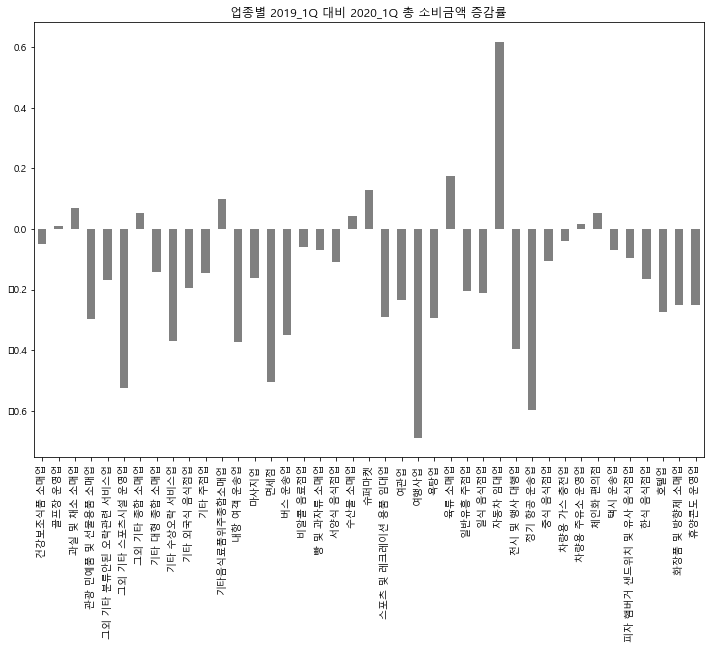

In [23]:
plt.figure(figsize=(12, 8))
amt_1Q['variance'].plot.bar(color='grey')
plt.xticks(range(0, amt_1Q['STD_CLSS_NM'].nunique()), amt_1Q['STD_CLSS_NM'].unique().tolist())
plt.title('업종별 2019_1Q 대비 2020_1Q 총 소비금액 증감률')
plt.show()

In [24]:
amt_1Q[['STD_CLSS_NM', 'variance']].sort_values(by='variance')

,STD_CLSS_NM,variance
23,여행사업,-0.687993
30,정기 항공 운송업,-0.596111
5,그외 기타 스포츠시설 운영업,-0.524312
14,면세점,-0.504270
29,전시 및 행사 대행업,-0.395371
12,내항 여객 운송업,-0.371995
8,기타 수상오락 서비스업,-0.369101
15,버스 운송업,-0.350234
3,관광 민예품 및 선물용품 소매업,-0.295773
24,욕탕업,-0.294564


1. 소비가 증가한 업종
 (1) 60%이상 - 자동차임대업  <br>
 (2) 10%이상 - 육류소매업, 슈퍼마켓 <br>
 (3) 5%이상 - 기타음식료품위주종합소매업, 과실 및 채소 소매업, 체인화편의점, 그외 기타 종합 소매업 <br>
 (4) 5%이하 - 수산물 소매업, 차량용 주유소 운영업, 골프장 운영업 <br>
 
 <br>

2. 소비가 감소한 업종
 (1) 50% 이상 - 여행사업, 정기 항공 운송업, 그외 기타 스포츠시설 운영업, 면세점 <br>
 (2) 30% 이상 - 전시 및 행사 대행업, 내항 여객 운송업, 기타 수상오락 서비스업, 버스 운송업 <br>
 (3) 20% 이상 - 관광 민예품 및 선물용품 소매업, 욕탕업, 스포츠 및 레크레이션 용품 임대업, 호텔업, 화장품 및 방향제 소매업, 휴양콘도 운영업, 여관업, 일식 음식점업, 일반유흥 주점업 <br>
 (4) 10% 이상 - 기타 외국식 음식점업, 그외 기타 분류안된 오락관련 서비스업, 한식 음식점업, 마사지업, 기타 주점업, 기타 대형 종합 소매업,서양식 음식점업, 중식 음식점업 <br>
 (5) 5% 이상 - 피자 햄버거 샌드위치 및 유사 음식점업, 빵 및 과자류 소매업, 택시 운송업, 건강보조식품 소매업 <br>
 (6) 5% 미만 - 비알콜 음료점업, 차량용 가스 충전업 <br>
 
 <br>
 
<b>Q. 어느정도를 유의미한 차이로 볼 것인지? (=얼만큼 이상 변화해야 코로나로 인한 영향이 있는 것으로 판단할 것인지?)</b>

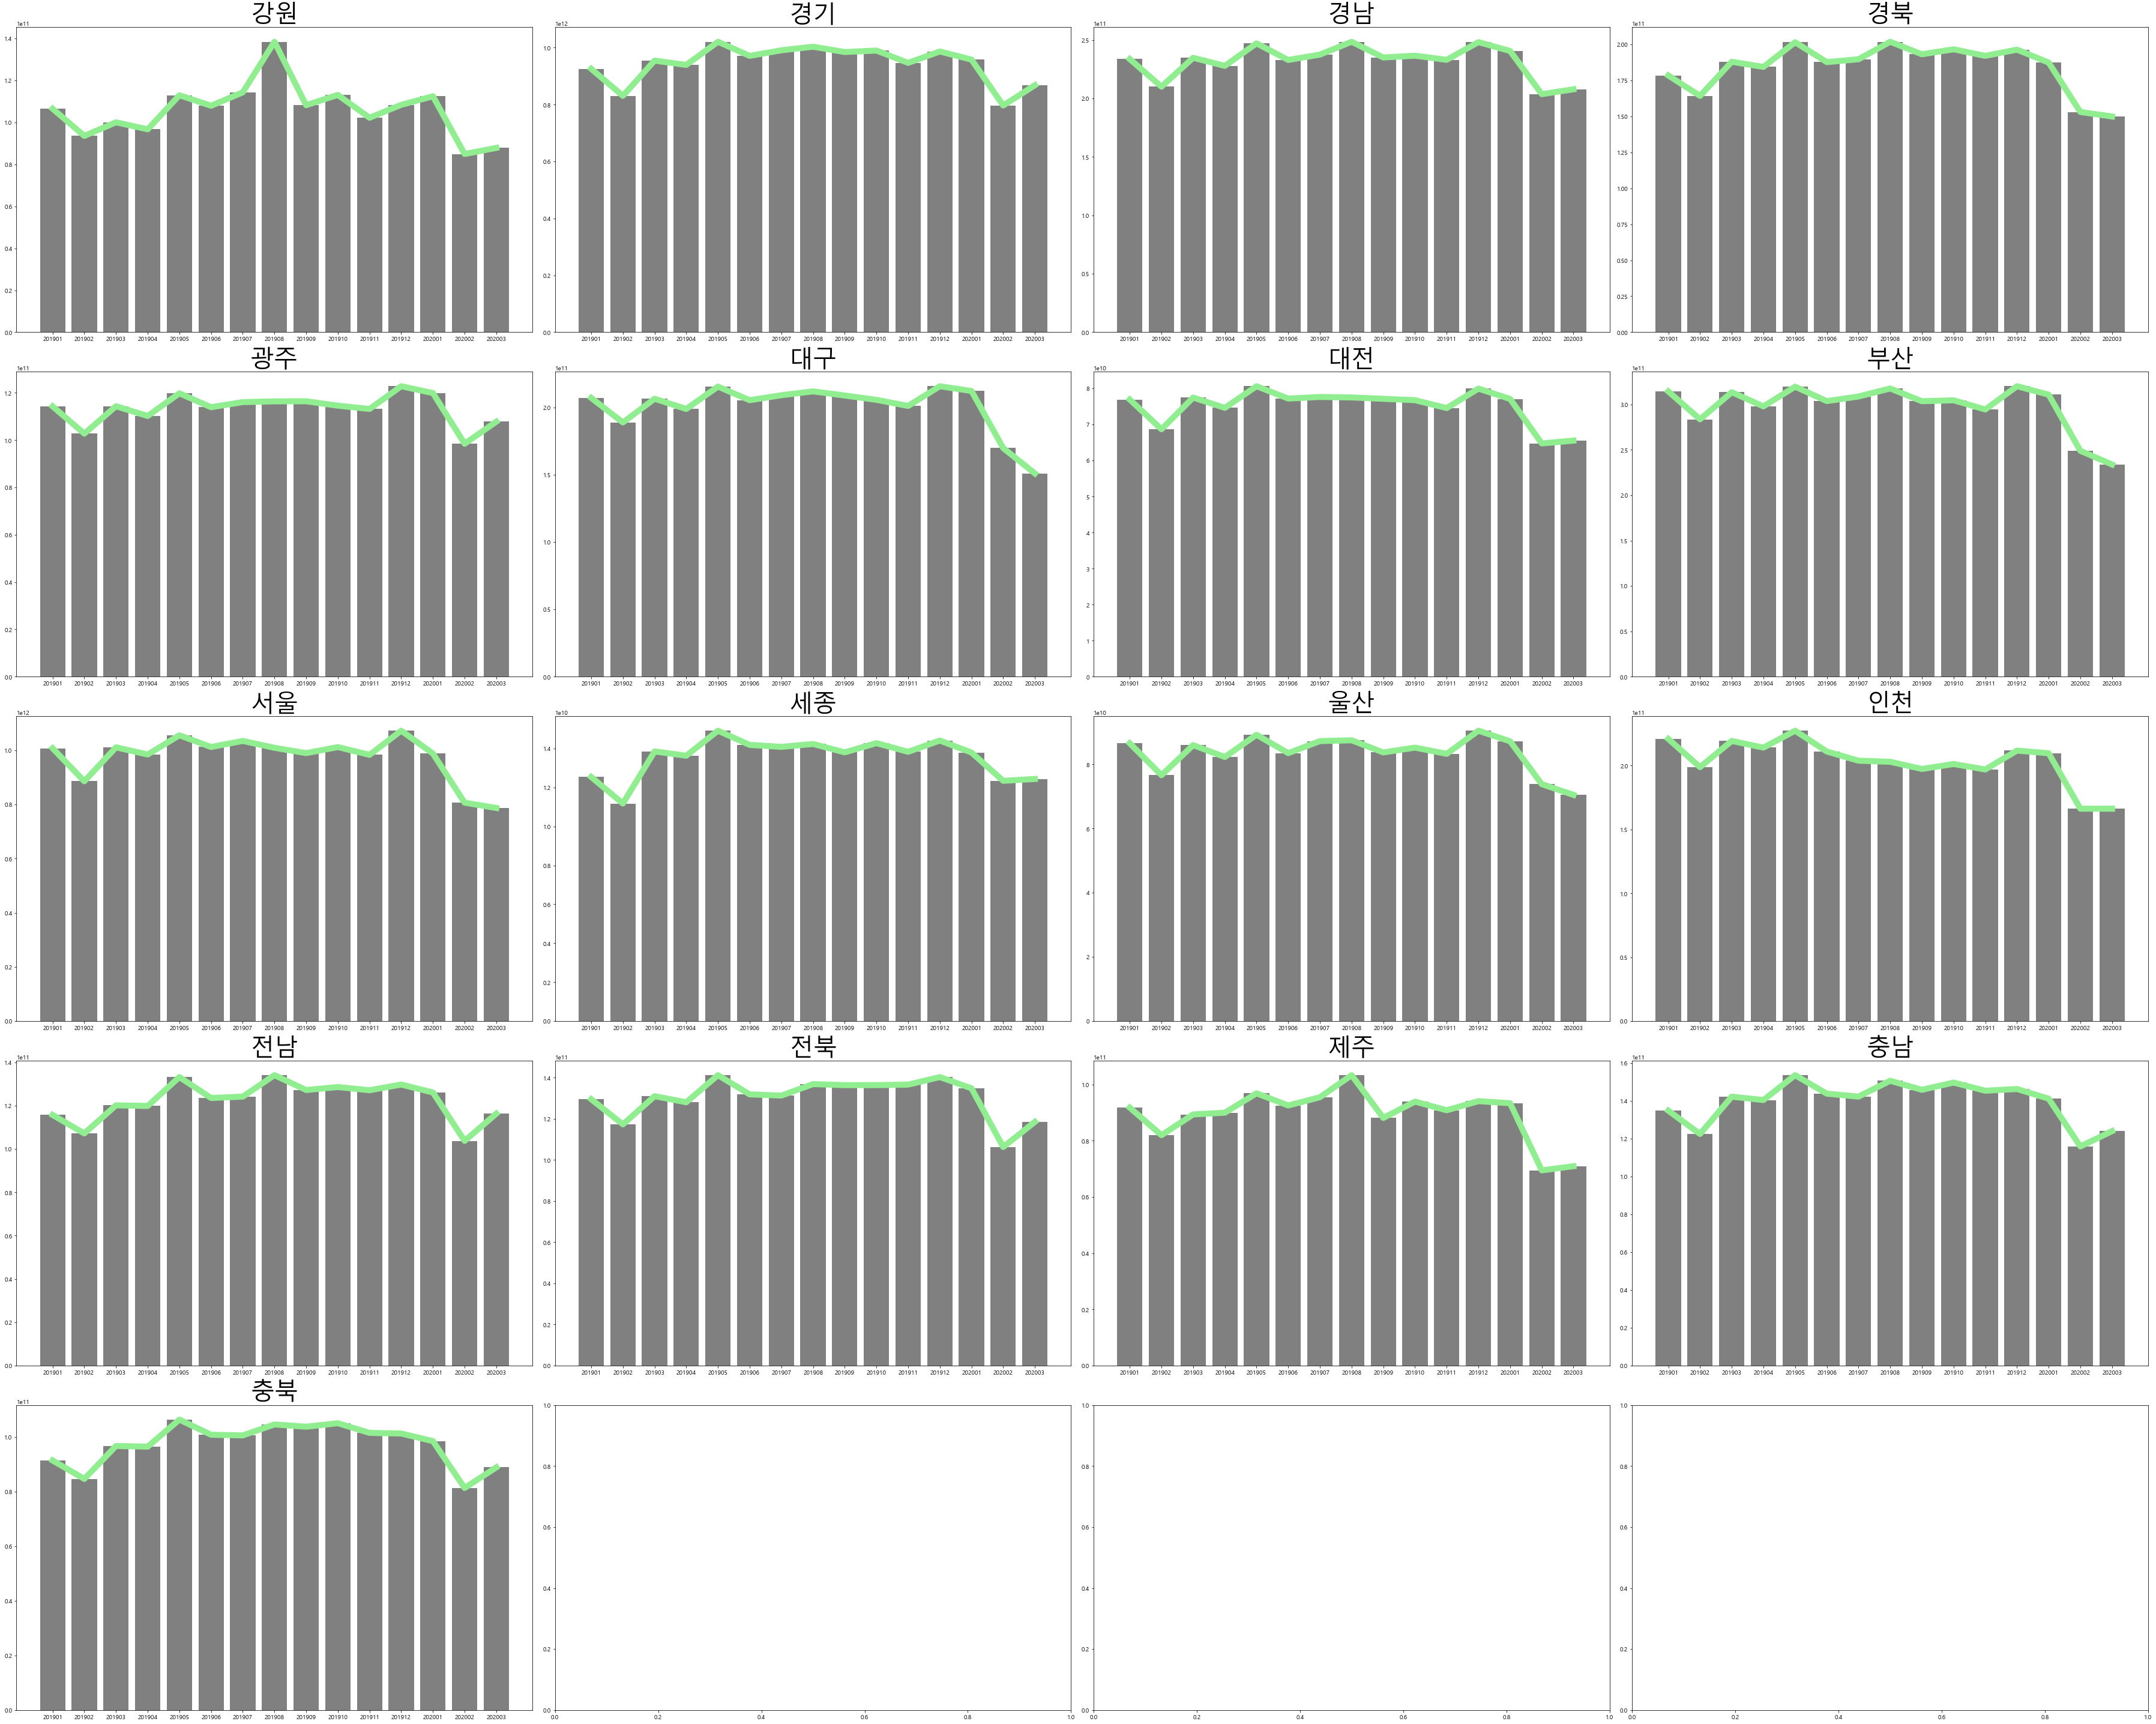

In [25]:
## 시도별 월별 사용량 추이

# 시도 리스트
sido_list = train['CARD_SIDO_NM'].unique().tolist() ;sido_list

# plotting
fit, ax = plt.subplots(5, 4, figsize=(50, 40))
ax = ax.flatten()

temp = train[['REG_YYMM', 'CARD_SIDO_NM', 'AMT']].groupby(['REG_YYMM', 'CARD_SIDO_NM']).sum().reset_index(drop=False)
x_values = ['201901', '201902', '201903', '201904', '201905', '201906', '201907', '201908', '201909', '201910', '201911', '201912', 
            '202001', '202002', '202003']

for i in range(0, 17):
    y_values = temp.loc[temp['CARD_SIDO_NM']==sido_list[i]]['AMT']

    ax[i].plot(x_values, y_values, color='lightgreen', linewidth=10)
    ax[i].bar(x_values, y_values, color='grey')
    
    ax[i].set_title(sido_list[i], fontsize=40)

plt.tight_layout()

- 업종별 소비량 추이 확인해보기: 어떤 업종이 가장 큰 영향을 받았는지(증가 혹은 감소)
- 코로나로 인해 영향을 가장 많이 받은 요인(업종, 지역, 소비자 특성별 소비량 등등) 찾아보기

<br>

- 코로나 제외한 예측 + 코로나 반영..

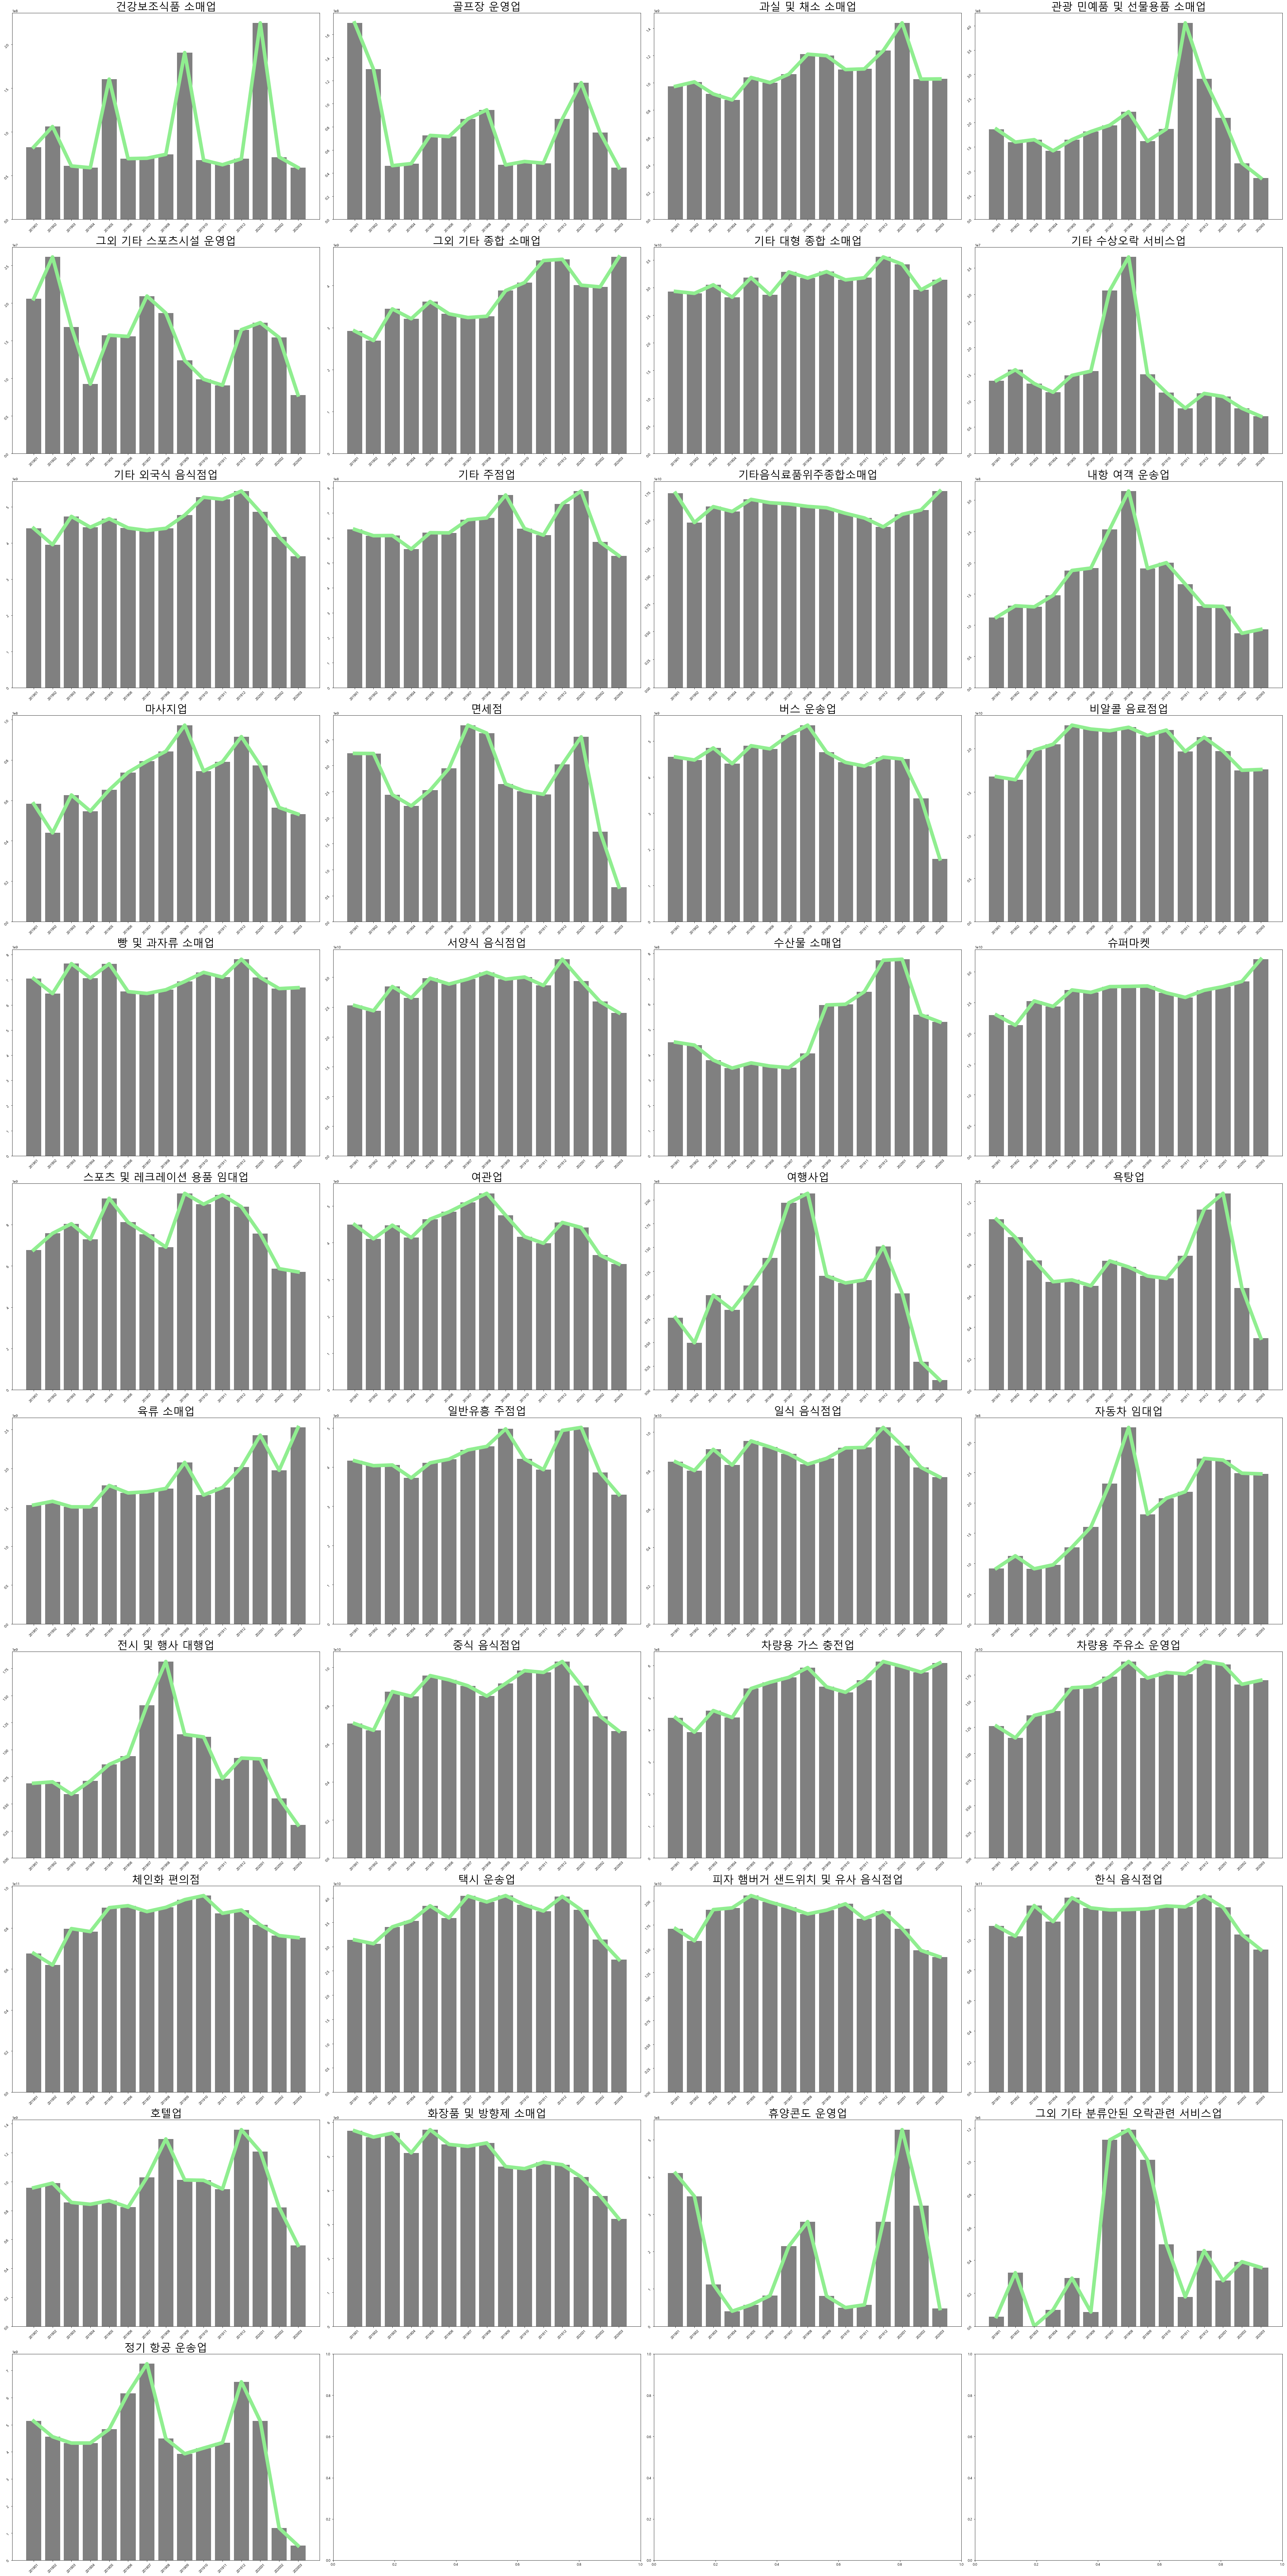

In [27]:
## 업종별 월별 사용량 추이
# plotting
fig, ax = plt.subplots(11, 4, figsize=(50, 100))
ax = ax.flatten()

x_values = ['201901', '201902', '201903', '201904', '201905', '201906', '201907', '201908', '201909', '201910', '201911', '201912', 
            '202001', '202002', '202003']

for i in range(0, 41):
    temp = train.loc[(train['STD_CLSS_NM']==class_list[i]) & (train['AGE']=='20s')]
    temp = temp[['REG_YYMM', 'AMT']].groupby('REG_YYMM').sum().reset_index(drop=False)
    y_values = temp['AMT'].tolist()
    ax[i].bar(x_values, y_values, color='grey')
    ax[i].plot(x_values, y_values, color='lightgreen', linewidth=10)
    ax[i].set_title(class_list[i], fontsize=30)
    ax[i].tick_params(labelrotation=45)

plt.tight_layout()

del temp